### Student Information
Name:許宸華

Student ID:107048130

GitHub ID:116143127 (RyanDustin)

---

### Instructions

1. First: do the **take home** exercises in the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2022-Lab1-Master](https://github.com/keziatamus/DM2022-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/keziatamus/DM2022-Lab1-Homework/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 20th 11:59 pm, Thursday)__. 

# Part 1: Take home exercise

In [2]:
# TEST necessary for when working with external scripts
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
# Data Preparation
from sklearn.datasets import fetch_20newsgroups

categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']

twenty_train = fetch_20newsgroups(subset='train', categories=categories, shuffle=True, random_state=42)

In [5]:
# Converting Dictionary into Pandas Dataframe
import pandas as pd

# my functions
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])

# add category to the dataframe
X['category'] = twenty_train.target

# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

In [7]:
X

,text,category,category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
...,...,...,...
2252,From: roos@Operoni.Helsinki.FI (Christophe Roo...,2,sci.med
2253,From: mhollowa@ic.sunysb.edu (Michael Holloway...,2,sci.med
2254,From: sasghm@theseus.unx.sas.com (Gary Merrill...,2,sci.med
2255,From: Dan Wallach <dwallach@cs.berkeley.edu> S...,2,sci.med


## Exercise 2 (take home)

### Experiment with other querying techniques using pandas dataframes.  Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [9]:
# My Answer
X.loc[:20, 'text':'category']

,text,category
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2


## Exercise 5 (take home)

### Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [11]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [12]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

### answer 

#### A is true: None is viewsed as a missing value in pandas
#### B is true: B is empty
#### For C,D they are all strings
#### E's type is Nonetype
#### D is an empty string

## Exercise 6 (take home)
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [16]:
X_sample = X.sample(n=1000)

In [17]:
X_sample

,text,category,category_name
612,From: hendrix@oasys.dt.navy.mil (Dane Hendrix)...,1,comp.graphics
150,From: lfoard@hopper.virginia.edu (Lawrence C. ...,3,soc.religion.christian
2182,From: rsc@altair.csustan.edu (Steve Cunningham...,1,comp.graphics
478,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
1650,From: keith@cco.caltech.edu (Keith Allan Schne...,0,alt.atheism
...,...,...,...
1730,From: bio1@navi.up.ac.za (Fourie Joubert) Subj...,1,comp.graphics
371,From: johnsh@rpi.edu (Hugh Johnson) Subject: R...,1,comp.graphics
1948,From: crussell@netcom.com (Chris Russell) Subj...,1,comp.graphics
1299,From: andreasa@dhhalden.no (ANDREAS ARFF) Subj...,1,comp.graphics


### Answer: we use shape function to take a look at their size:

In [19]:
print("X.shape:{}".format(X.shape))
print("X_sample.shape:{}".format(X_sample.shape))

X.shape:(2257, 3)
X_sample.shape:(1000, 3)


## Exercise 8(take home)

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot:title={'center':'Category distribution'}>

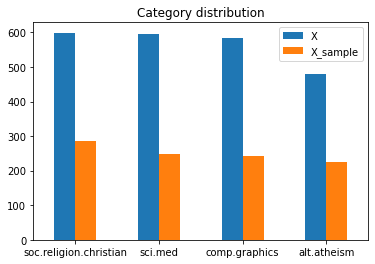

In [31]:
#bar chart
df = pd.DataFrame({'X': X.category_name.value_counts(), 'X_sample': X_sample.category_name.value_counts()} , index=["soc.religion.christian", "sci.med", "comp.graphics", "alt.atheism"])
df.plot.bar(rot=0,title = 'Category distribution')

## **Exercise 10**

We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

---

In [57]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()

X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix

X_sub_counts = X_counts[4, 0:100].toarray()

X_sub_counts


array([[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int64)

In [55]:
np.nonzero(X_sub_counts)

(array([0, 0], dtype=int64), array([ 0, 37], dtype=int64))

In [59]:
# Answer here
count_vect.get_feature_names()[37]    #Why get_feature_names_out() cannot work?

'01'

 #### This 1 represents 37 from the vocabulary.

## Exercise 11 (take home) 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [64]:
import matplotlib.pyplot as plt

[[ 122  124]
 [ 399    1]
 [ 572    1]
 [1055    0]
 [1400    1]
 [1584    1]
 [1664    0]
 [1664   34]
 [1664   36]
 [1750  177]
 [2169    1]]


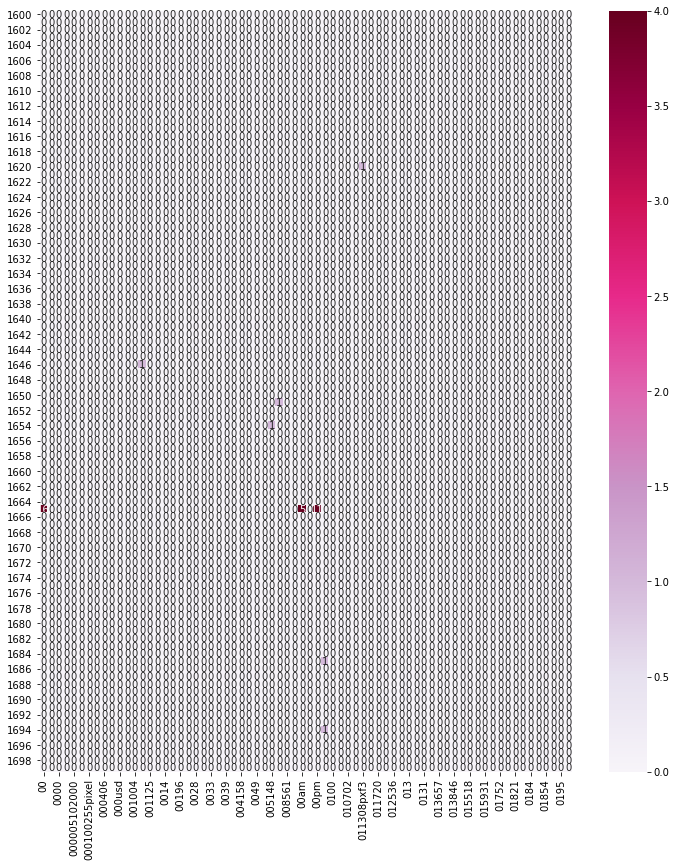

In [67]:
# Answer here
# Find the index: Frequency > 4 and the first 200 terms
sol = np.argwhere(X_counts[1:2257,0:200] > 4)
print(sol)
#Specific the range to 1600 to 1700
#Select 70 terms to represent the heatmap
import seaborn as sns
x = [str(i) for i in count_vect.get_feature_names()[0:70]]
y = [str(i) for i in list(X.index)[1600:1700]]
z = X_counts[1600:1700, 0:70].toarray()
plt.subplots(figsize=(13, 14))
ax = sns.heatmap(pd.DataFrame(z, columns = x, index = y),
                 cmap="PuRd",
                 vmin=0, vmax=4, annot=True, square=True)

## Exercise 12 (take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

In [70]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

In [71]:
X_reduced.shape

(2257, 3)

Text(0.5, 0, '\nZ Label')

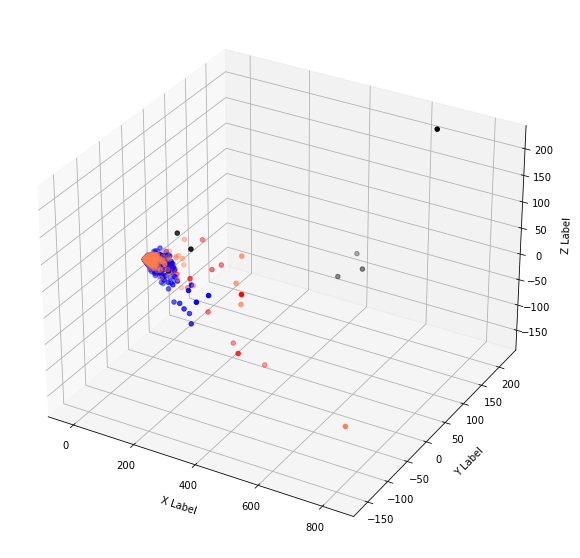

In [74]:
from sklearn.decomposition import PCA
X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())

col = ['coral', 'blue', 'black', 'red']

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize = (25,10))
ax = fig.add_subplot(111,projection='3d')

for c, category in zip(col, categories):
    x= X_reduced[X['category_name'] == category].T[0]
    y= X_reduced[X['category_name'] == category].T[1]
    z= X_reduced[X['category_name'] == category].T[2]
    ax.scatter(x, y, z, c = c, marker='o')
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label')
ax.set_ylabel('\nY Label')
ax.set_zlabel('\nZ Label')

## Exercise 13 (take home)
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [75]:
# term_frequencies
term_frequencies = []
for j in range(0, X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

term_frequencies = np.asarray(X_counts.sum(axis=0))[0]

In [81]:
#plotly interactive visualization
import plotly.express as px

fig = px.bar(term_frequencies[:300], x=count_vect.get_feature_names()[:300], y=term_frequencies[:300], labels = {'x':'terms', 'y':'frequencies'})

fig.show()

[Text(0, 0, '00'),
 Text(1, 0, '000'),
 Text(2, 0, '0000'),
 Text(3, 0, '0000001200'),
 Text(4, 0, '000005102000'),
 Text(5, 0, '0001'),
 Text(6, 0, '000100255pixel'),
 Text(7, 0, '00014'),
 Text(8, 0, '000406'),
 Text(9, 0, '0007'),
 Text(10, 0, '000usd'),
 Text(11, 0, '0010'),
 Text(12, 0, '001004'),
 Text(13, 0, '0010580b'),
 Text(14, 0, '001125'),
 Text(15, 0, '001200201pixel'),
 Text(16, 0, '0014'),
 Text(17, 0, '001642'),
 Text(18, 0, '00196'),
 Text(19, 0, '002'),
 Text(20, 0, '0028'),
 Text(21, 0, '003258u19250'),
 Text(22, 0, '0033'),
 Text(23, 0, '0038'),
 Text(24, 0, '0039'),
 Text(25, 0, '004021809'),
 Text(26, 0, '004158'),
 Text(27, 0, '004627'),
 Text(28, 0, '0049'),
 Text(29, 0, '00500'),
 Text(30, 0, '005148'),
 Text(31, 0, '00630'),
 Text(32, 0, '008561'),
 Text(33, 0, '0094'),
 Text(34, 0, '00am'),
 Text(35, 0, '00index'),
 Text(36, 0, '00pm'),
 Text(37, 0, '01'),
 Text(38, 0, '0100'),
 Text(39, 0, '010116'),
 Text(40, 0, '010702'),
 Text(41, 0, '011255'),
 Text(42, 

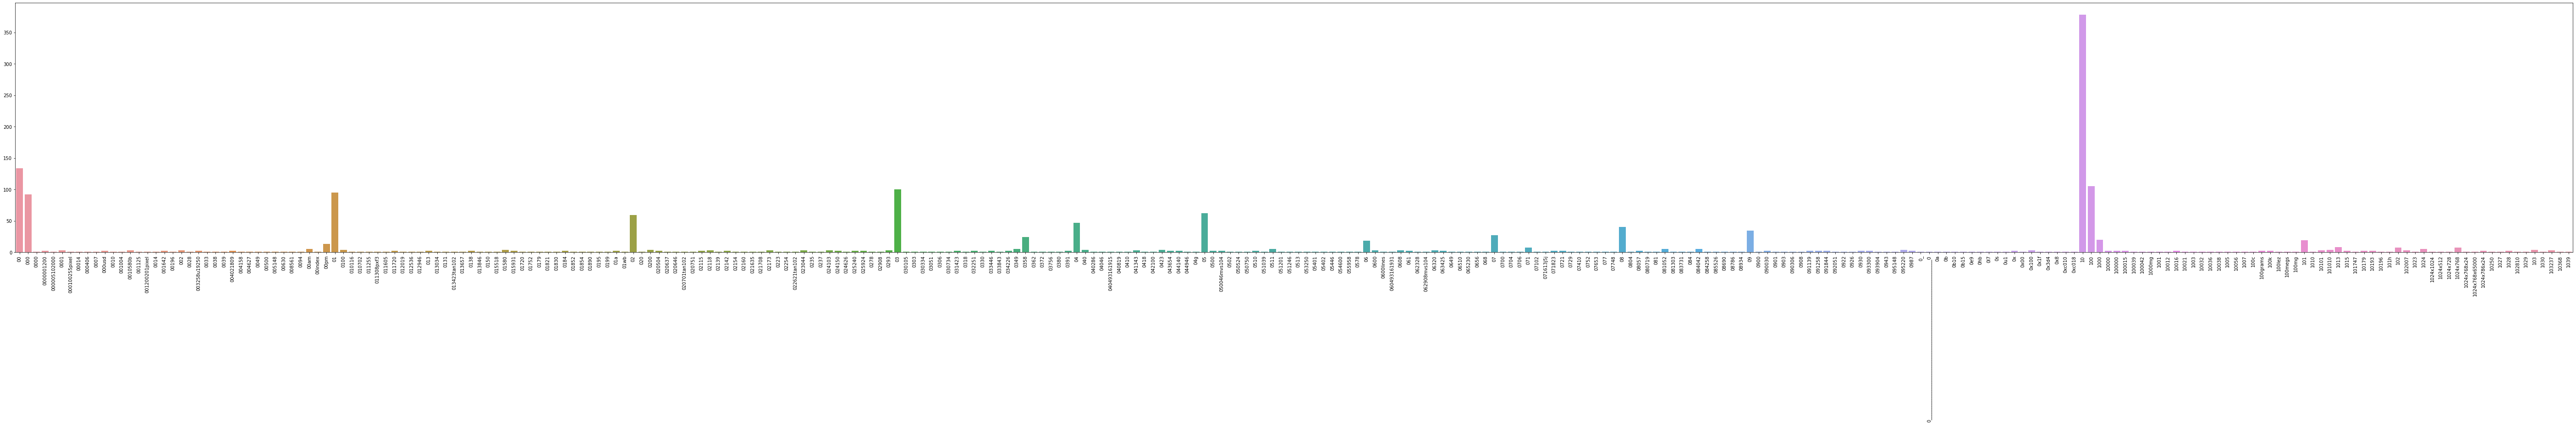

In [83]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names()[:300], rotation = 90)

## Exercise 14 (take home)
The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

### I want to know which terms have high frequency

In [93]:
#計算前50詞頻
f = pd.DataFrame(count_vect.get_feature_names(), columns= ['terms'])
f['frequency'] = term_frequencies
f = f.sort_values(by=['frequency'], ascending=False)  # 排序
fig = px.bar(f[:50], x=f['terms'][:50], y=f['frequency'][:50], title  = "TOP50 Term Frequencies", labels = {'x':'Terms', 'y':'頻率'})

fig.show()

# From the trend of the plot, We notice that there are some kind of stopword!!!!

## Exercise 15 (take home)
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [94]:
#計算前500詞頻
f = pd.DataFrame(count_vect.get_feature_names(), columns= ['terms'])
f['frequency'] = term_frequencies
f = f.sort_values(by=['frequency'], ascending=False)  # 排序
fig = px.bar(f[:50], x=f['terms'][:500], y=f['frequency'][:500], labels = {'x':'Terms', 'y':'頻率'})

fig.show()

# Long tail and still there are some stop words!!!

## Exercise 16 (take home) 
Try to generate the binarization using the `category_name` column instead. Does it work?

# Yes it works!!!!

In [96]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()
mlb.fit(X.category_name)
X['bin_category_name'] = mlb.transform(X['category_name']).tolist()
X[0:40]


,text,category,category_name,bin_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[0, 0, 0, 1]"
5,From: vbv@lor.eeap.cwru.edu (Virgilio (Dean) B...,3,soc.religion.christian,"[0, 0, 0, 1]"
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian,"[0, 0, 0, 1]"
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med,"[0, 0, 1, 0]"
8,From: geb@cs.pitt.edu (Gordon Banks) Subject: ...,2,sci.med,"[0, 0, 1, 0]"
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med,"[0, 0, 1, 0]"
